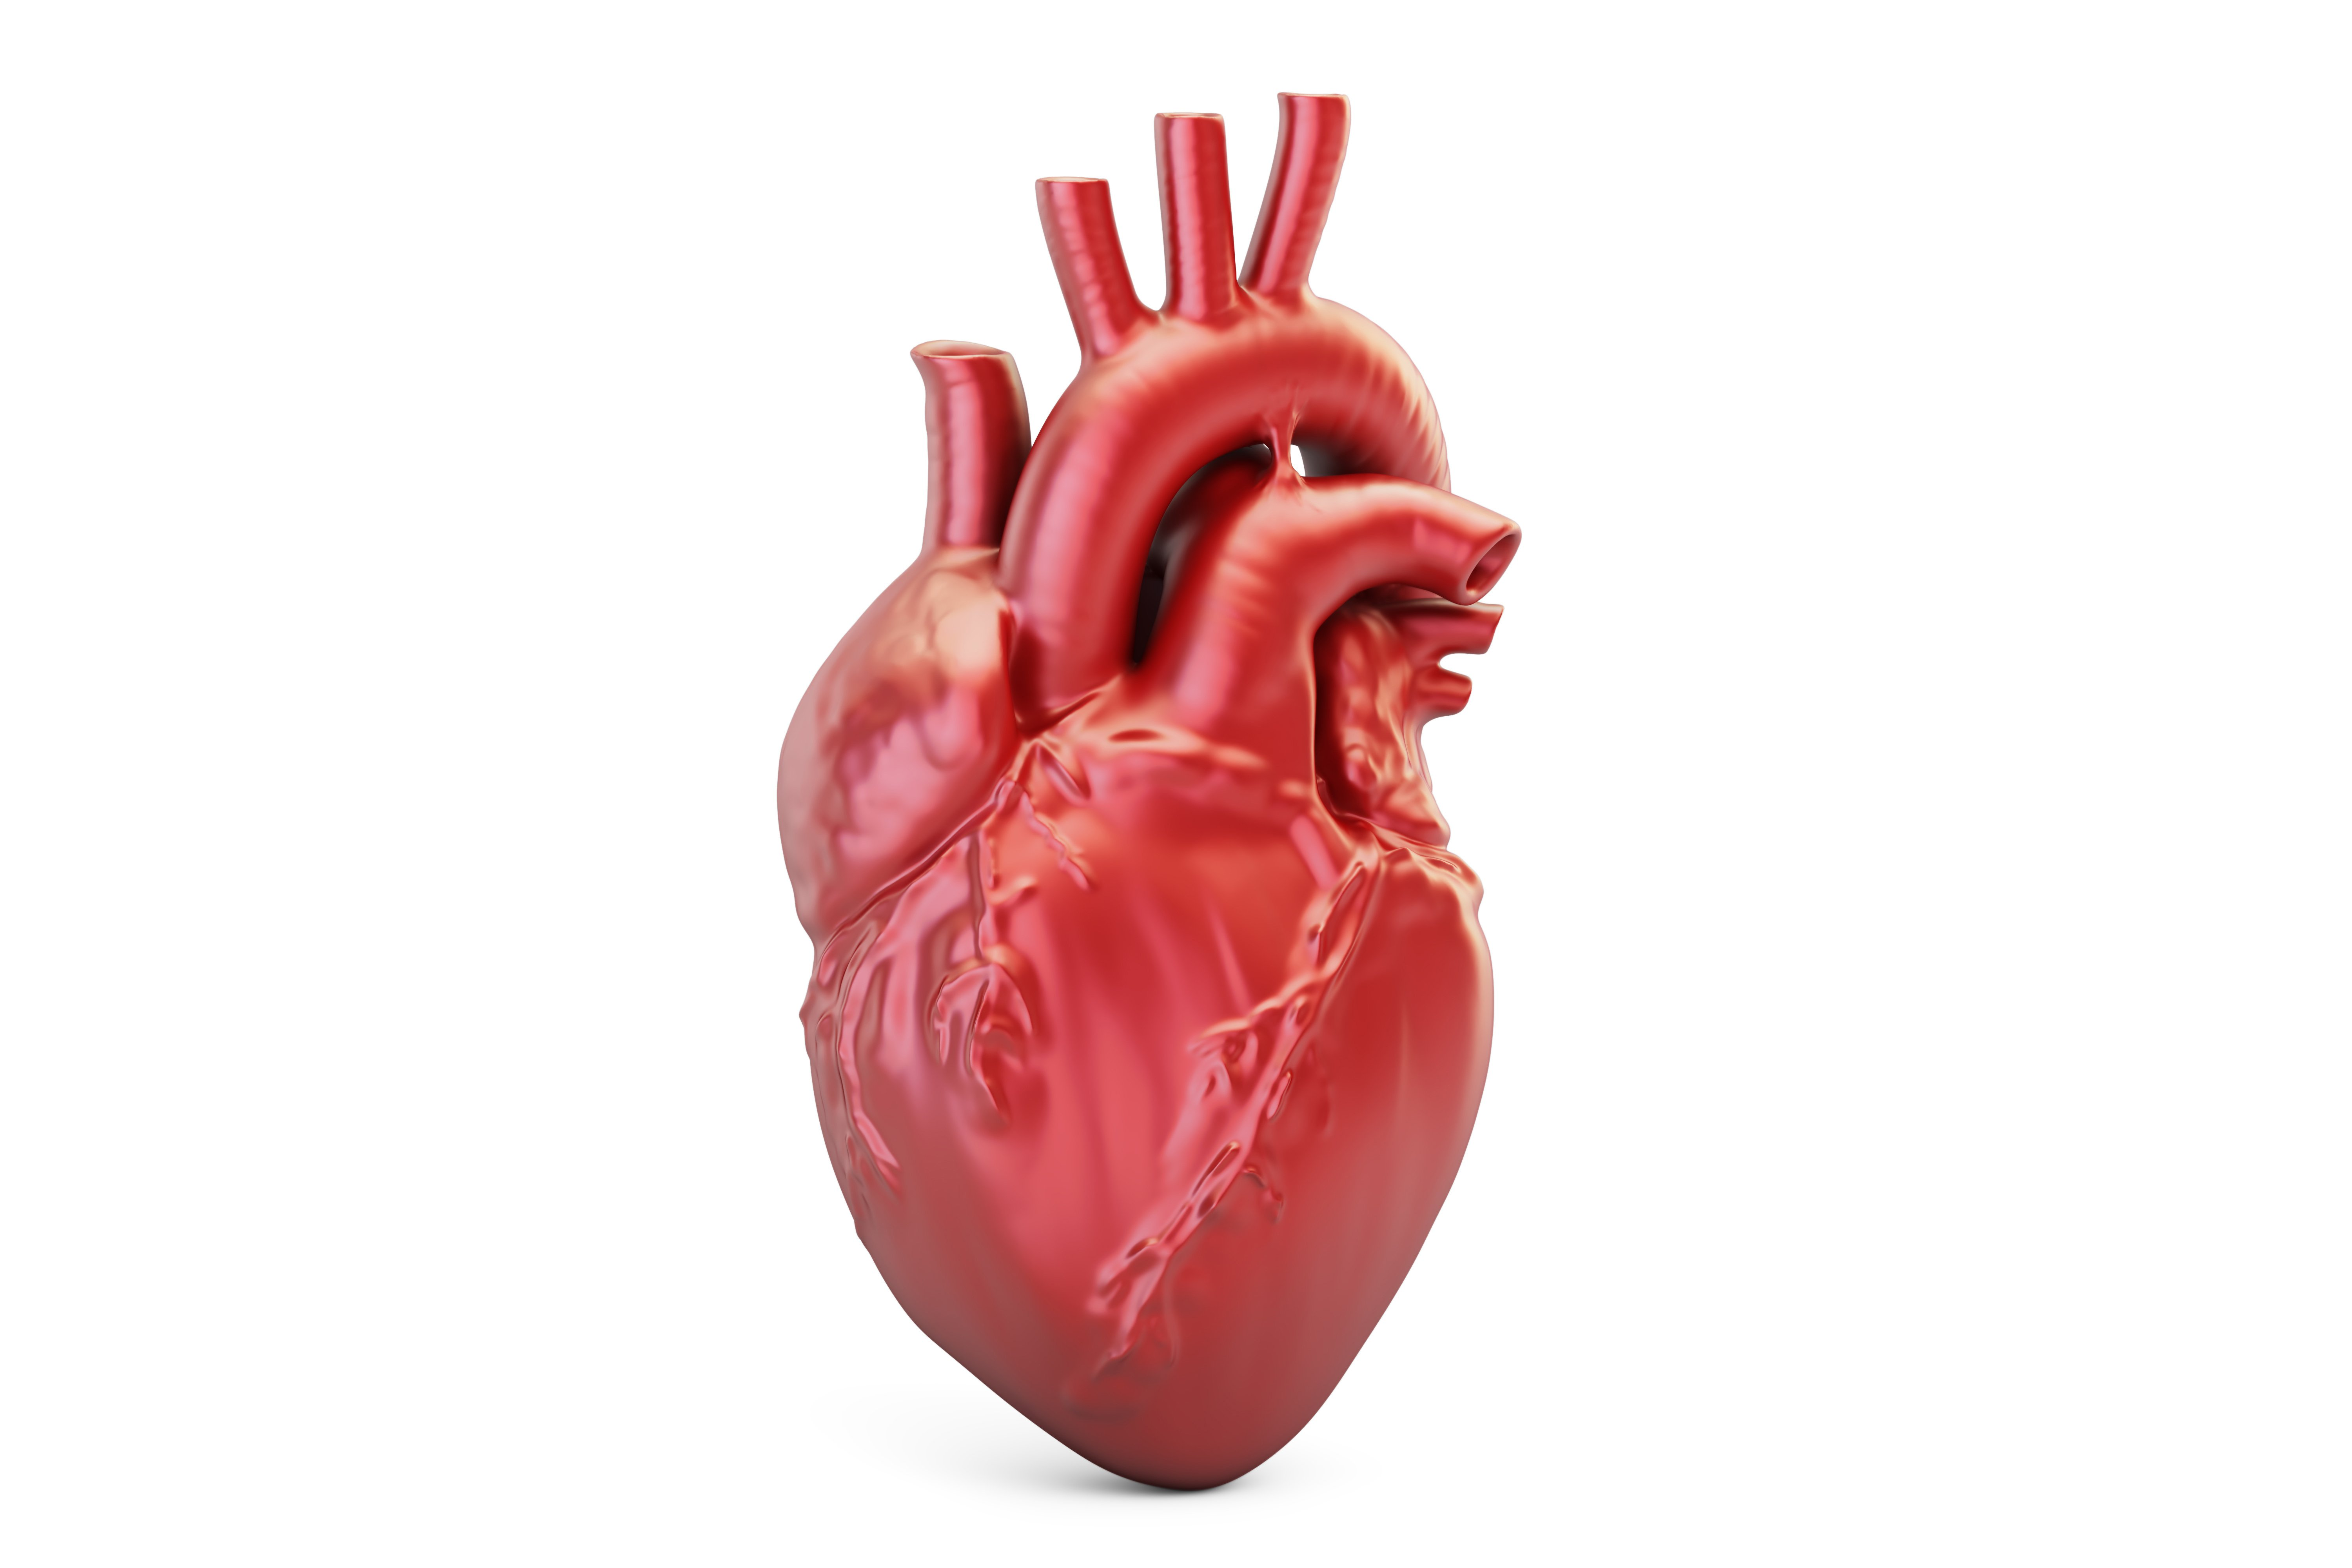

<p style="text-align:center;"><span style="font-size:48px;"><span style="color:#E72B3B;"><span style="font-family:cursive;"> Hello everyone! </span> </span>  </span></p>

<a id="0"></a>
# <p style="padding:10px;background-color:black ;margin:0;color:#ffffff;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Table of Contents 💻</p>

<div style = 'border : 3px solid non; background-color:#f2f2f2
              ;font-family:Times New Roman;
              font-size:110%;padding:10px'>

    
    
* **[1. A Brief Explanation](#1)**
    
 
   - What is this project about?  
    
    
* **[2. Import Libraries ](#2)**
    
      
   - Libraries that we need
    
  
* **[3. Import Dataset ](#3)**  
    
   
   - The main dataset  
    
   
* **[4. Data Preprocessing ](#4)**
    
    
   - Data description
    
    
   - Variable explanation
    
    
   - Noise Detection
    
    
   - Separation dataset
    
    
   - Visualization
    
    
   - Normalize dataset
    
   
* **[5. Machine Learning Models ](#5)**
    
    
   - KNN + tune hyperparameters
    
    
   - SVM + tune hyperparameters
    
    
   - Decision Trees + tune hyperparameters
    
    
   - Random Forest + tune hyperparameters
      
    
* **[6. Conclusion ](#6)**
    

<a id="1"></a>
# <p style="padding:10px;background-color:black ;margin:0;color:#ffffff;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">A Brief Explanation </p>

<div style = 'border : 3px solid non; background-color:#f2f2f2 ; ;padding:10px'>


* **1. What is this project about?**

  - In this project, heart data is used, the target of which is in two classes. People who have heart disease and people who don't. The importance of this type of project in the medical world is very high and it should be given more attention. In this kernel, I create a predictive model with the help of different classification algorithms so that people can be predicted to have or not have a disease.

<a id="2"></a>
# <p style="padding:10px;background-color:black ;margin:0;color:#ffffff;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Import Libraries </p>

<div style = 'border : 3px solid non; background-color:#f2f2f2 ; ;padding:10px'>


* **Libraries that we need**

  - In this project, I used numpy, pandas, matplotlib, seaborn, colorma and some sklearn packages.
    


In [ ]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
import colorama
from colorama import Back
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler

<a id="3"></a>
# <p style="padding:10px;background-color:black ;margin:0;color:#ffffff;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Import Dataset </p>

* **[Table of Content](#0)**

In [ ]:
Main_Dataset = pd.read_csv('/kaggle/input/heart-attack-analysis-prediction-dataset/heart.csv')
Main_Dataset = pd.DataFrame(Main_Dataset)

In [ ]:
print(Main_Dataset.shape)
Main_Dataset.head(10).style.set_properties(**{'background-color': '#F6E7E8',
                           'color': 'black',
                           'border-color': 'black'})


<div style = 'border : 3px solid non; background-color:#f2f2f2 ; ;padding:10px'>


* **Note:**

  - The samples in this dataset are really few and may cause challenges in the work. Only 303 examples are not enough.

<a id="4"></a>
# <p style="padding:10px;background-color:black ;margin:0;color:#ffffff;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Data Preprocessing </p>

* **[Table of Content](#0)**

<div style = 'border : 3px solid non; background-color:#f2f2f2 ; ;padding:10px'>


* **Data desciption:**

  - With a simple, easy an excellent "def describe" function that is below, we can extract some interesting results.
    Such as name of variables, type of variables, count of them, how many unique values are here, count of missing values and min,max of each column.

In [ ]:
def describe(Main_Dataset):
    
    
    variables = []
    dtypes = []
    count = []
    unique = []
    missing = []
    min_ = []
    max_ = []
    
    
    for item in Main_Dataset.columns:
        variables.append(item)
        dtypes.append(Main_Dataset[item].dtype)
        count.append(len(Main_Dataset[item]))
        unique.append(len(Main_Dataset[item].unique()))
        missing.append(Main_Dataset[item].isna().sum())
        
        if Main_Dataset[item].dtypes == 'float64' or Main_Dataset[item].dtypes == 'int64':
            min_.append(Main_Dataset[item].min())
            max_.append(Main_Dataset[item].max())
        else:
            min_.append('Str')
            max_.append('Str')
        

    output = pd.DataFrame({
        'variable': variables, 
        'dtype': dtypes,
        'count': count,
        'unique': unique,
        'missing value': missing,
        'Min': min_,
        'Max': max_
    })    
        
    return output

In [ ]:
Styles = [dict(selector = "caption",
               props = [("color", "white"), 
                        ("text-align", "center"),
                       ('font-size', '15pt'),
                       ('background-color', '#E72B3B')])]

In [ ]:
desc_df = describe(Main_Dataset)
desc_df = desc_df.style.set_caption('Overview of the dataset').set_table_styles(Styles)
desc_df.set_properties(**{'background-color': '#F6E7E8',
                           'color': 'black',
                           'border-color': 'black'})

<div style = 'border : 3px solid non; background-color:#f2f2f2 ; ;padding:10px'>


* **Variable Explanation:**

  

   Age : Age of the patient

   Sex : Sex of the patient

   exang: exercise induced angina (1 = yes; 0 = no)

   caa: number of major vessels (0-4)

   cp : Chest Pain type chest pain type
       Value 1: typical angina
       Value 2: atypical angina
       Value 3: non-anginal pain
       Value 4: asymptomatic

   trtbps : resting blood pressure (in mm Hg)

   chol : cholestoral in mg/dl fetched via BMI sensor

   fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

   rest_ecg : resting electrocardiographic results
       Value 0: normal
       Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
       Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

   thalach : maximum heart rate achieved
    
    
   ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]

   target : 0= less chance of heart attack 1= more chance of heart attack


<div style = 'border : 3px solid non; background-color:#f2f2f2 ; ;padding:10px'>


* **Noise Detection:**

  - We can use boxplots in continuous variables for detect any noises.

In [ ]:
Numerical = ['age', 'trtbps','chol','thalachh','oldpeak']
i = 0
while i < 5:
    fig = plt.figure(figsize = [30,3], dpi=200)
    plt.subplot(2,2,1)
    sns.boxplot(x = Numerical[i], data = Main_Dataset,
           boxprops = dict(facecolor = "#E72B3B"))
    i += 1
    plt.show()

In [ ]:
Chol_noise = Main_Dataset[Main_Dataset["chol"]>500].index
Chol_noise

In [ ]:
Main_Dataset.drop(index=[85], inplace=True)
Main_Dataset.shape

In [ ]:
fig = plt.figure(figsize = [15,3], dpi=200)
sns.boxplot(x = 'chol', data = Main_Dataset,
        boxprops = dict(facecolor = "#E72B3B"))
    
plt.show()

<div style = 'border : 3px solid non; background-color:#f2f2f2 ; ;padding:10px'>


* **Seperation Dataset:**

  - Let's devide dataset to two parts for analysis. 1: People that don't have heart disease and 2: People who have it.



In [ ]:
Target_0_data = Main_Dataset[Main_Dataset["output"]==0]
Target_0_data = pd.DataFrame(Target_0_data)
Target_1_data = Main_Dataset[Main_Dataset["output"]==1]
Target_1_data = pd.DataFrame(Target_1_data)
print("The shape of data when target is '0': Not disease",Target_0_data.shape)
print("The shape of data when target is '1': Disease",Target_1_data.shape)

In [ ]:
Target_0_data.sort_values(by=['age'], inplace=True)
Target_1_data.sort_values(by=['age'], inplace=True)

<div style = 'border : 3px solid non; background-color:#f2f2f2 ; ;padding:10px'>


* **Visualization:**

  - In this part of visualization, I use "sns.barplot" for categorical variables vs "age".
    We can see how the rate of change is affected by age.



In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 5), dpi=200)
sns.barplot(x= Target_0_data['age'], y= Target_0_data['cp'], errorbar=None,
            palette="dark:salmon_r",ax= axes[0]).set(title='Age - CP in Heart Disease = 0')
sns.barplot(x= Target_1_data['age'], y= Target_1_data['cp'], errorbar=None,
            palette="dark:salmon_r",ax= axes[1]).set(title='Age - CP in Heart Disease = 1')


plt.tight_layout()

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 5), dpi=200)
sns.barplot(x= Target_0_data['age'], y= Target_0_data['fbs'], errorbar=None,
            palette="dark:salmon_r",ax= axes[0]).set(title='Age - fbs in Heart Disease = 0')
sns.barplot(x= Target_1_data['age'], y= Target_1_data['fbs'], errorbar=None,
            palette="dark:salmon_r",ax= axes[1]).set(title='Age - fbs in Heart Disease = 1')


plt.tight_layout()

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 5), dpi=200)
sns.barplot(x= Target_0_data['age'], y= Target_0_data['restecg'], errorbar=None,
            palette="dark:salmon_r",ax= axes[0]).set(title='Age - restecg in Heart Disease = 0')
sns.barplot(x= Target_1_data['age'], y= Target_1_data['restecg'], errorbar=None,
            palette="dark:salmon_r",ax= axes[1]).set(title='Age - restecg in Heart Disease = 1')


plt.tight_layout()

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 5), dpi=200)
sns.barplot(x= Target_0_data['age'], y= Target_0_data['exng'], errorbar=None,
            palette="dark:salmon_r",ax= axes[0]).set(title='Age - exng in Heart Disease = 0')
sns.barplot(x= Target_1_data['age'], y= Target_1_data['exng'], errorbar=None,
            palette="dark:salmon_r",ax= axes[1]).set(title='Age - exng in Heart Disease = 1')


plt.tight_layout()

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 5), dpi=200)
sns.barplot(x= Target_0_data['age'], y= Target_0_data['slp'], errorbar=None,
            palette="dark:salmon_r",ax= axes[0]).set(title='Age - slp in Heart Disease = 0')
sns.barplot(x= Target_1_data['age'], y= Target_1_data['slp'], errorbar=None,
            palette="dark:salmon_r",ax= axes[1]).set(title='Age - slp in Heart Disease = 1')


plt.tight_layout()

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 5), dpi=200)
sns.barplot(x= Target_0_data['age'], y= Target_0_data['caa'], errorbar=None,
            palette="dark:salmon_r",ax= axes[0]).set(title='Age - caa in Heart Disease = 0')
sns.barplot(x= Target_1_data['age'], y= Target_1_data['caa'], errorbar=None,
            palette="dark:salmon_r",ax= axes[1]).set(title='Age - caa in Heart Disease = 1')


plt.tight_layout()

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 5), dpi=200)
sns.barplot(x= Target_0_data['age'], y= Target_0_data['thall'], errorbar=None,
            palette="dark:salmon_r",ax= axes[0]).set(title='Age - thall in Heart Disease = 0')
sns.barplot(x= Target_1_data['age'], y= Target_1_data['thall'], errorbar=None,
            palette="dark:salmon_r",ax= axes[1]).set(title='Age - thall in Heart Disease = 1')


plt.tight_layout()

<div style = 'border : 3px solid non; background-color:#f2f2f2 ; ;padding:10px'>



  - In this part of the visualization, I use a "scatter plot" versus a "line plot" to compare people who have heart disease and people who don't.
    Of course we can see how the rate of change is affected by age.
    



In [ ]:
plt.figure(figsize=(20,5), dpi=200)
plt.plot(Target_0_data['age'], Target_0_data['trtbps'], color= '#E72B3B')
plt.scatter(Target_1_data['age'], Target_1_data['trtbps'], color= 'black')

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.legend(["Without Disease","With Disease"], fontsize=15)

plt.title("Age - Resting blood pressure (in mm Hg)", fontsize=20)
plt.xlabel("Age", fontsize=15)
plt.ylabel("trtbps", fontsize=15)


plt.show()

In [ ]:
plt.figure(figsize=(20,5), dpi=200)
plt.plot(Target_0_data['age'], Target_0_data['chol'], color= '#E72B3B')
plt.scatter(Target_1_data['age'], Target_1_data['chol'], color= 'black')

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.legend(["Without Disease","With Disease"], fontsize=15)

plt.title("Age - Cholestoral in mg/dl fetched via BMI sensor", fontsize=20)
plt.xlabel("Age", fontsize=15)
plt.ylabel("chol", fontsize=15)


plt.show()

In [ ]:
plt.figure(figsize=(20,5), dpi=200)
plt.plot(Target_0_data['age'], Target_0_data['thalachh'], color= '#E72B3B')
plt.scatter(Target_1_data['age'], Target_1_data['thalachh'], color= 'black')

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.legend(["Without Disease","With Disease"], fontsize=15)

plt.title("Age - Maximum heart rate achieved", fontsize=20)
plt.xlabel("Age", fontsize=15)
plt.ylabel("thalachh", fontsize=15)


plt.show()

In [ ]:
plt.figure(figsize=(20,5), dpi=200)
plt.plot(Target_0_data['age'], Target_0_data['oldpeak'], color= '#E72B3B')
plt.scatter(Target_1_data['age'], Target_1_data['oldpeak'], color= 'black')

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.legend(["Without Disease","With Disease"], fontsize=15)

plt.title("Age - ST depression caused by activity in comparison to rest", fontsize=20)
plt.xlabel("Age", fontsize=15)
plt.ylabel("oldpeak", fontsize=15)


plt.show()

<div style = 'border : 3px solid non; background-color:#f2f2f2 ; ;padding:10px'>




  - Count plot for various categorical variables.
    



In [ ]:
fig = plt.figure(figsize=(18,15))
gs = fig.add_gridspec(3,3)
gs.update(wspace=0.5, hspace=0.25)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[0,2])
ax3 = fig.add_subplot(gs[1,0])
ax4 = fig.add_subplot(gs[1,1])
ax5 = fig.add_subplot(gs[1,2])
ax6 = fig.add_subplot(gs[2,0])
ax7 = fig.add_subplot(gs[2,1])
ax8 = fig.add_subplot(gs[2,2])

background_color = "white"
fig.patch.set_facecolor(background_color) 
ax0.set_facecolor(background_color) 
ax1.set_facecolor(background_color) 
ax2.set_facecolor(background_color) 
ax3.set_facecolor(background_color) 
ax4.set_facecolor(background_color) 
ax5.set_facecolor(background_color) 
ax6.set_facecolor(background_color) 
ax7.set_facecolor(background_color) 
ax8.set_facecolor(background_color) 

# Title of the plot
ax0.spines["bottom"].set_visible(False)
ax0.spines["left"].set_visible(False)
ax0.spines["top"].set_visible(False)
ax0.spines["right"].set_visible(False)
ax0.tick_params(left=False, bottom=False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.text(0.5,0.5,
         'Count plot for various\n categorical features',
         horizontalalignment='center',
         verticalalignment='center',
         fontsize=18, fontweight='bold',
         fontfamily='serif',
         color="#000000")

# Sex count
ax1.text(0.3, 220, 'Sex', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax1,data=Main_Dataset,x='sex',palette="dark:salmon_r")
ax1.set_xlabel("")
ax1.set_ylabel("")

# Exng count
ax2.text(0.3, 220, 'Exng', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax2.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax2,data=Main_Dataset,x='exng',palette="dark:salmon_r")
ax2.set_xlabel("")
ax2.set_ylabel("")

# Caa count
ax3.text(1.5, 200, 'Caa', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax3.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax3,data=Main_Dataset,x='caa',palette="dark:salmon_r")
ax3.set_xlabel("")
ax3.set_ylabel("")

# Cp count
ax4.text(1.5, 162, 'Cp', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax4.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax4,data=Main_Dataset,x='cp',palette="dark:salmon_r")
ax4.set_xlabel("")
ax4.set_ylabel("")

# Fbs count
ax5.text(0.5, 290, 'Fbs', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax5.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax5,data=Main_Dataset,x='fbs',palette="dark:salmon_r")
ax5.set_xlabel("")
ax5.set_ylabel("")

# Restecg count
ax6.text(0.75, 165, 'Restecg', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax6.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax6,data=Main_Dataset,x='restecg',palette="dark:salmon_r")
ax6.set_xlabel("")
ax6.set_ylabel("")

# Slp count
ax7.text(0.85, 155, 'Slp', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax7.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax7,data=Main_Dataset,x='slp',palette="dark:salmon_r")
ax7.set_xlabel("")
ax7.set_ylabel("")

# Thall count
ax8.text(1.2, 180, 'Thall', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax8.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax8,data=Main_Dataset,x='thall',palette="dark:salmon_r")
ax8.set_xlabel("")
ax8.set_ylabel("")

for s in ["top","right","left"]:
    ax1.spines[s].set_visible(False)
    ax2.spines[s].set_visible(False)
    ax3.spines[s].set_visible(False)
    ax4.spines[s].set_visible(False)
    ax5.spines[s].set_visible(False)
    ax6.spines[s].set_visible(False)
    ax7.spines[s].set_visible(False)
    ax8.spines[s].set_visible(False)

<div style = 'border : 3px solid non; background-color:#f2f2f2 ; ;padding:10px'>


* **Normalize:**

  - Before starting the machine learning part, we must normalize the entire dataset (except target, but in this case, the target is binary and it's ok).
    



In [ ]:
Features = Main_Dataset.drop(columns='output')
Features = pd.DataFrame(Features)

In [ ]:
scaler = MinMaxScaler()
Norm_data = scaler.fit_transform(Features)
Norm_df = pd.DataFrame(Norm_data, columns= Features.columns)

desc_norm_df = describe(Norm_df)
desc_norm_df = desc_norm_df.style.set_caption('Overview of the dataset').set_table_styles(Styles)
desc_norm_df.set_properties(**{'background-color': '#F6E7E8',
                           'color': 'black',
                           'border-color': 'black'})

In [ ]:
Norm_df.head(10).style.set_properties(**{'background-color': '#F6E7E8',
                           'color': 'black',
                           'border-color': 'black'})

<a id="5"></a>
# <p style="padding:10px;background-color:black ;margin:0;color:#ffffff;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Machine Learning Models </p>

* **[Table of Content](#0)**

In [ ]:
X = Norm_df#This dataframe is created for features
y = Main_Dataset['output'].values.reshape(-1,1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=40)

<div style = 'border : 3px solid non; background-color:#f2f2f2 ; ;padding:10px'>


* **KNN + tune hyperparameters**

  - The first algorithm is KNN. The strategy is simple. Create two empty lists for appending the accuracies of the model, then change some of the important hyperparameters. In knn, I consider the range of K and P as the hyperparameters for change. Then, I compare all of the results and scores and finally chose the best one.
    



In [ ]:
training_acc_1 = []
test_acc_1 = []

range_k = range(2,20)

for number_k in range_k:
    knn = KNeighborsClassifier(n_neighbors = number_k, p=1)
    knn.fit (X_train, y_train.ravel())
    training_acc_1.append(knn.score(X_train,y_train))
    test_acc_1.append(knn.score(X_test, y_test))
    

plt.figure(figsize=(15,5), dpi=200)    
plt.plot(range_k, training_acc_1, label='Acc of training', color= 'black')
plt.plot(range_k, test_acc_1, label='Acc of test set', color= '#E72B3B')
plt.ylabel('Acc')
plt.xlabel('Number of Neighbors')
plt.title('Acc - Number of K')
plt.legend()
plt.xticks(range(1,20))
plt.annotate('Best K_neighbor', xy=(3,0.89),xytext=(7.2,0.86), arrowprops=dict(facecolor='#E72B3B', shrink=0.05),fontsize=20)
plt.axvline(x = 3, linestyle= 'dotted', c= 'black')
plt.show()

In [ ]:
K = 3
clf_1 = KNeighborsClassifier(K, p=1)
clf_1.fit(X_train, y_train.ravel())
y_pred_1 = clf_1.predict(X_test)
print("Accuracy", metrics.accuracy_score(y_test,y_pred_1))
Best_knn = metrics.accuracy_score(y_test,y_pred_1)

In [ ]:
conf_matrix_1 = confusion_matrix(y_test, y_pred_1)

colors = ["black", "#E72B3B", "#E72B3B", "#E72B3B"]
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)
fig = plt.figure(figsize=(15, 3), dpi=200)
ax = plt.subplot()
plt.title("Confusion_matrix , KNN , K = 3 , P = 1")
annot = np.array([[f"{conf_matrix_1[0, 0]}", f"{conf_matrix_1[0, 1]}"],
                  [f"{conf_matrix_1[1, 0]}", f"{conf_matrix_1[1, 1]}"]], dtype=object)


sns.heatmap(conf_matrix_1,
            annot=annot,
            annot_kws={"size": 11},
            ax=ax,
            fmt='',
            cmap=cmap,
            cbar=True,
            )
plt.xlabel("Pred")
plt.ylabel("Real")
plt.show()

In [ ]:
training_acc_2 = []
test_acc_2 = []

range_k = range(2,20)

for number_k in range_k:
    knn = KNeighborsClassifier(n_neighbors = number_k, p=2)
    knn.fit (X_train, y_train.ravel())
    training_acc_2.append(knn.score(X_train,y_train))
    test_acc_2.append(knn.score(X_test, y_test))
    

plt.figure(figsize=(15,5), dpi=200)    
plt.plot(range_k, training_acc_2, label='Acc of training', color= 'black')
plt.plot(range_k, test_acc_2, label='Acc of test set', color= '#E72B3B')
plt.ylabel('Acc')
plt.xlabel('Number of Neighbors')
plt.title('Acc - Number of K')
plt.legend()
plt.xticks(range(1,20))
plt.annotate('Best K_neighbor', xy=(3,0.87),xytext=(7.2,0.82), arrowprops=dict(facecolor='#E72B3B', shrink=0.05),fontsize=20)
plt.axvline(x = 3, linestyle= 'dotted', c= 'black')
plt.show()

In [ ]:
K = 3
clf_2 = KNeighborsClassifier(K, p=2)
clf_2.fit(X_train, y_train.ravel())
y_pred_2 = clf_2.predict(X_test)
print("Accuracy", metrics.accuracy_score(y_test,y_pred_2))

In [ ]:
conf_matrix_2 = confusion_matrix(y_test, y_pred_2)

colors = ["black", "#E72B3B", "#E72B3B", "#E72B3B"]
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)
fig = plt.figure(figsize=(15, 3), dpi=200)
ax = plt.subplot()
plt.title("Confusion_matrix , KNN , K = 3 , P = 2")
annot = np.array([[f"{conf_matrix_2[0, 0]}", f"{conf_matrix_2[0, 1]}"],
                  [f"{conf_matrix_2[1, 0]}", f"{conf_matrix_2[1, 1]}"]], dtype=object)

sns.heatmap(conf_matrix_2,
            annot=annot,
            annot_kws={"size": 11},
            ax=ax,
            fmt='',
            cmap=cmap,
            cbar=True,
            )
plt.xlabel("Pred")
plt.ylabel("Real")
plt.show()

In [ ]:
class color:
   BOLD = '\033[1m'
   END = '\033[0m'

In [ ]:
print(Back.RED +color.BOLD+ "Classification report for clf_1 (K= 3 and p = 1):"+ Back.RESET+ color.END)
print(classification_report(y_train, clf_1.predict(X_train)))
print(Back.RED +color.BOLD +"Classification report for clf_2 (K= 3 and p = 2):"+ Back.RESET+ color.END)
print(classification_report(y_train, clf_2.predict(X_train)))

<div style = 'border : 3px solid non; background-color:#f2f2f2 ; ;padding:10px'>


* **SVM + tune hyperparameters**

  - The second algorithm is SVM. In SVM, I consider the range of C "0.05 - 50" and Kernles "Linear, Poly, RBF and sigmoid" as the hyperparameters for change. Then, I compare all of the results and scores and finally chose the best one.
    



In [ ]:
training_acc_3 = []
test_acc_3 = []

C = [0.5,0.6,0.7,0.8,0.9,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,
    26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50]
#Kernel = {'linear', 'poly', 'rbf', 'sigmoid'}

for C_ in C:
    SVM = SVC(C= C_, kernel= 'linear')
    SVM.fit (X_train, y_train.ravel())
    training_acc_3.append(SVM.score(X_train,y_train))
    test_acc_3.append(SVM.score(X_test, y_test))
    
    
plt.figure(figsize=(15,5), dpi=200)    
plt.plot(C, training_acc_3, label='Acc of training', color= 'black')
plt.plot(C, test_acc_3, label='Acc of test set', color= '#E72B3B')
plt.ylabel('Acc')
plt.xlabel('Number of C')
plt.title('Acc - Number of C, Linear')
plt.legend()
plt.xticks(range(0,50))
plt.annotate('Best C', xy=(20,0.86),xytext=(27.2,0.86), arrowprops=dict(facecolor='#E72B3B', shrink=0.05),fontsize=20)
plt.axvline(x = 20, linestyle= 'dotted', c= 'black')
plt.show()

In [ ]:
clf_3 = SVC(C= 20, kernel= 'linear')
clf_3.fit(X_train, y_train.ravel())
y_pred_3 = clf_3.predict(X_test)
print("Accuracy", metrics.accuracy_score(y_test,y_pred_3))
Best_SVM = metrics.accuracy_score(y_test,y_pred_3)

In [ ]:
conf_matrix_3 = confusion_matrix(y_test, y_pred_3)

colors = ["black", "#E72B3B", "#E72B3B", "#E72B3B"]
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)
fig = plt.figure(figsize=(15, 3), dpi=200)
ax = plt.subplot()
plt.title("Confusion_matrix (SVM , Linear , C = 20)")
annot = np.array([[f"{conf_matrix_3[0, 0]}", f"{conf_matrix_3[0, 1]}"],
                  [f"{conf_matrix_3[1, 0]}", f"{conf_matrix_3[1, 1]}"]], dtype=object)

sns.heatmap(conf_matrix_3,
            annot=annot,
            annot_kws={"size": 11},
            ax=ax,
            fmt='',
            cmap=cmap,
            cbar=True,
            )
plt.xlabel("Pred")
plt.ylabel("Real")
plt.show()

In [ ]:
training_acc_4 = []
test_acc_4 = []

C = [0.5,0.6,0.7,0.8,0.9,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,
    26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50]
#Kernel = {'linear', 'poly', 'rbf', 'sigmoid'}

for C_ in C:
    SVM = SVC(C= C_, kernel= 'poly')
    SVM.fit (X_train, y_train.ravel())
    training_acc_4.append(SVM.score(X_train,y_train))
    test_acc_4.append(SVM.score(X_test, y_test))
    
    
plt.figure(figsize=(15,5), dpi=200)    
plt.plot(C, training_acc_4, label='Acc of training', color= 'black')
plt.plot(C, test_acc_4, label='Acc of test set', color= '#E72B3B')
plt.ylabel('Acc')
plt.xlabel('Number of C ')
plt.title('Acc - Number of C - Poly')
plt.legend()
plt.xticks(range(0,50))
plt.annotate('Best C', xy=(2,0.9),xytext=(6.2,0.9), arrowprops=dict(facecolor='#E72B3B', shrink=0.05),fontsize=20)
plt.axvline(x = 2, linestyle= 'dotted', c= 'black')
plt.show()

In [ ]:
clf_4 = SVC(C= 2, kernel= 'poly')
clf_4.fit(X_train, y_train.ravel())
y_pred_4 = clf_4.predict(X_test)
print("Accuracy", metrics.accuracy_score(y_test,y_pred_4))

In [ ]:
conf_matrix_4 = confusion_matrix(y_test, y_pred_4)

colors = ["black", "#E72B3B", "#E72B3B", "#E72B3B"]
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)
fig = plt.figure(figsize=(15, 3), dpi=200)
ax = plt.subplot()
plt.title("Confusion_matrix (SVM , Poly , C = 2)")
annot = np.array([[f"{conf_matrix_4[0, 0]}", f"{conf_matrix_4[0, 1]}"],
                  [f"{conf_matrix_4[1, 0]}", f"{conf_matrix_4[1, 1]}"]], dtype=object)

sns.heatmap(conf_matrix_4,
            annot=annot,
            annot_kws={"size": 11},
            ax=ax,
            fmt='',
            cmap=cmap,
            cbar=True,
            )
plt.xlabel("Pred")
plt.ylabel("Real")
plt.show()

In [ ]:
training_acc_5 = []
test_acc_5 = []

C = [0.5,0.6,0.7,0.8,0.9,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,
    26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50]
#Kernel = {'linear', 'poly', 'rbf', 'sigmoid'}

for C_ in C:
    SVM = SVC(C= C_, kernel= 'rbf')
    SVM.fit (X_train, y_train.ravel())
    training_acc_5.append(SVM.score(X_train,y_train))
    test_acc_5.append(SVM.score(X_test, y_test))
    
    
plt.figure(figsize=(15,5), dpi=200)    
plt.plot(C, training_acc_5, label='Acc of training', color= 'black')
plt.plot(C, test_acc_5, label='Acc of test set', color= '#E72B3B')
plt.ylabel('Acc')
plt.xlabel('Number of C ')
plt.title('Acc - Number of C - rbf')
plt.legend()
plt.xticks(range(0,50))
plt.annotate('Best C', xy=(1,0.9),xytext=(6.2,0.9), arrowprops=dict(facecolor='#E72B3B', shrink=0.05),fontsize=20)
plt.axvline(x = 1, linestyle= 'dotted', c= 'black')
plt.show()

In [ ]:
clf_5 = SVC(C= 1, kernel= 'rbf')
clf_5.fit(X_train, y_train.ravel())
y_pred_5 = clf_5.predict(X_test)
print("Accuracy", metrics.accuracy_score(y_test,y_pred_5))

In [ ]:
conf_matrix_5 = confusion_matrix(y_test, y_pred_5)

colors = ["black", "#E72B3B", "#E72B3B", "#E72B3B"]
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)
fig = plt.figure(figsize=(15, 3), dpi=200)
ax = plt.subplot()
plt.title("Confusion_matrix (SVM , rbf , C = 1)")
annot = np.array([[f"{conf_matrix_5[0, 0]}", f"{conf_matrix_5[0, 1]}"],
                  [f"{conf_matrix_5[1, 0]}", f"{conf_matrix_5[1, 1]}"]], dtype=object)

sns.heatmap(conf_matrix_5,
            annot=annot,
            annot_kws={"size": 11},
            ax=ax,
            fmt='',
            cmap=cmap,
            cbar=True,
            )
plt.xlabel("Pred")
plt.ylabel("Real")
plt.show()

In [ ]:
training_acc_6 = []
test_acc_6 = []

C = [0.5,0.6,0.7,0.8,0.9,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,
    26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50]
#Kernel = {'linear', 'poly', 'rbf', 'sigmoid'}

for C_ in C:
    SVM = SVC(C= C_, kernel= 'sigmoid')
    SVM.fit (X_train, y_train.ravel())
    training_acc_6.append(SVM.score(X_train,y_train))
    test_acc_6.append(SVM.score(X_test, y_test))
    
    
plt.figure(figsize=(15,5), dpi=200)    
plt.plot(C, training_acc_6, label='Acc of training', color= 'black')
plt.plot(C, test_acc_6, label='Acc of test set', color= '#E72B3B')
plt.ylabel('Acc')
plt.xlabel('Number of C ')
plt.title('Acc - Number of C - sigmoid')
plt.legend()
plt.xticks(range(0,50))
plt.annotate('Best C', xy=(0.7,0.8),xytext=(5.2,0.8), arrowprops=dict(facecolor='#E72B3B', shrink=0.05),fontsize=20)
plt.axvline(x =0.7, linestyle= 'dotted', c= 'black')
plt.show()

In [ ]:
clf_6 = SVC(C= 0.7, kernel= 'sigmoid')
clf_6.fit(X_train, y_train.ravel())
y_pred_6 = clf_6.predict(X_test)
print("Accuracy", metrics.accuracy_score(y_test,y_pred_6))

In [ ]:
conf_matrix_6 = confusion_matrix(y_test, y_pred_6)

colors = ["black", "#E72B3B", "#E72B3B", "#E72B3B"]
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)
fig = plt.figure(figsize=(15, 3), dpi=200)
ax = plt.subplot()
plt.title("Confusion_matrix (SVM , sigmoid , C = 0.7)")
annot = np.array([[f"{conf_matrix_6[0, 0]}", f"{conf_matrix_6[0, 1]}"],
                  [f"{conf_matrix_6[1, 0]}", f"{conf_matrix_6[1, 1]}"]], dtype=object)

sns.heatmap(conf_matrix_6,
            annot=annot,
            annot_kws={"size": 11},
            ax=ax,
            fmt='',
            cmap=cmap,
            cbar=True,
            )
plt.xlabel("Pred")
plt.ylabel("Real")
plt.show()

In [ ]:
print(Back.RED +color.BOLD+ "Classification report for clf_3 (Svm, kernel = Linear, C = 20):"+ Back.RESET+ color.END)
print(classification_report(y_train, clf_3.predict(X_train)))
print(Back.RED +color.BOLD +"Classification report for clf_4 (Svm, kernel = Poly, C = 2):"+ Back.RESET+ color.END)
print(classification_report(y_train, clf_4.predict(X_train)))
print(Back.RED +color.BOLD+ "Classification report for clf_5 (Svm, kernel = rbf, C = 1):"+ Back.RESET+ color.END)
print(classification_report(y_train, clf_5.predict(X_train)))
print(Back.RED +color.BOLD +"Classification report for clf_6 (Svm, kernel = Sigmoid, C = 0.7):"+ Back.RESET+ color.END)
print(classification_report(y_train, clf_6.predict(X_train)))

<div style = 'border : 3px solid non; background-color:#f2f2f2 ; ;padding:10px'>


* **Decision Trees + tune hyperparameters**

  - The third algorithm is Decision trees. In DT, I consider the range of max depth "1 - 20" and Criterions "gini, entropy and log_loss" as the hyperparameters for change. Then, I compare all of the results and scores and finally chose the best one.
    



In [ ]:
training_acc_7 = []
test_acc_7 = []

max_depth = range(1,20)
#Criterion = gini, entropy, log_loss

for depth in max_depth:
    DT = DecisionTreeClassifier(max_depth= depth, criterion= 'gini', random_state=40)
    DT.fit (X_train, y_train.ravel())
    training_acc_7.append(DT.score(X_train,y_train))
    test_acc_7.append(DT.score(X_test, y_test))
    
    
plt.figure(figsize=(15,5), dpi=200)    
plt.plot(max_depth, training_acc_7, label='Acc of training', color= 'black')
plt.plot(max_depth, test_acc_7, label='Acc of test set', color= '#E72B3B')
plt.ylabel('Acc')
plt.xlabel('Depth')
plt.title('Acc - MaxDepth - gini')
plt.legend()
plt.xticks(range(1,20))
plt.annotate('Best Depth', xy=(4,0.87),xytext=(5.2,0.88), arrowprops=dict(facecolor='#E72B3B', shrink=0.05),fontsize=20)
plt.axvline(x =4, linestyle= 'dotted', c= 'black')
plt.axhline(y =1, linestyle= 'dotted', c= 'black')
plt.show();

In [ ]:
clf_7 = DecisionTreeClassifier(max_depth = 4 , criterion= 'gini', random_state=40)
clf_7.fit(X_train, y_train.ravel())
y_pred_7 = clf_7.predict(X_test)
print("Accuracy", metrics.accuracy_score(y_test,y_pred_7))

In [ ]:
conf_matrix_7 = confusion_matrix(y_test, y_pred_7)

colors = ["black", "#E72B3B", "#E72B3B", "#E72B3B"]
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)
fig = plt.figure(figsize=(15, 3), dpi=200)
ax = plt.subplot()
plt.title("Confusion_matrix (DT , gini , Depth = 4)")
annot = np.array([[f"{conf_matrix_7[0, 0]}", f"{conf_matrix_7[0, 1]}"],
                  [f"{conf_matrix_7[1, 0]}", f"{conf_matrix_7[1, 1]}"]], dtype=object)

sns.heatmap(conf_matrix_7,
            annot=annot,
            annot_kws={"size": 11},
            ax=ax,
            fmt='',
            cmap=cmap,
            cbar=True,
            )
plt.xlabel("Pred")
plt.ylabel("Real")
plt.show()

In [ ]:
training_acc_8 = []
test_acc_8 = []

max_depth = range(1,20)
#Criterion = gini, entropy, log_loss

for depth in max_depth:
    DT = DecisionTreeClassifier(max_depth= depth, criterion= 'entropy', random_state=5)
    DT.fit (X_train, y_train.ravel())
    training_acc_8.append(DT.score(X_train,y_train))
    test_acc_8.append(DT.score(X_test, y_test))
    
    
plt.figure(figsize=(15,5), dpi=200)    
plt.plot(max_depth, training_acc_8, label='Acc of training', color= 'black')
plt.plot(max_depth, test_acc_8, label='Acc of test set', color= '#E72B3B')
plt.ylabel('Acc')
plt.xlabel('Depth')
plt.title('Acc - MaxDepth - entropy')
plt.legend()
plt.xticks(range(1,20))
plt.annotate('Best Depth', xy=(6,0.87),xytext=(8.2,0.88), arrowprops=dict(facecolor='#E72B3B', shrink=0.05),fontsize=20)
plt.axvline(x =6, linestyle= 'dotted', c= 'black')
plt.axhline(y =1, linestyle= 'dotted', c= 'black')
plt.show();

In [ ]:
clf_8 = DecisionTreeClassifier(max_depth = 6, criterion= 'entropy', random_state=5)
clf_8.fit(X_train, y_train.ravel())
y_pred_8 = clf_8.predict(X_test)
print("Accuracy", metrics.accuracy_score(y_test,y_pred_8))
Best_DT = metrics.accuracy_score(y_test,y_pred_8)

In [ ]:
conf_matrix_8 = confusion_matrix(y_test, y_pred_8)

colors = ["black", "#E72B3B", "#E72B3B", "#E72B3B"]
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)
fig = plt.figure(figsize=(15, 3), dpi=200)
ax = plt.subplot()
plt.title("Confusion_matrix (DT , entropy , Depth = 6)")
annot = np.array([[f"{conf_matrix_8[0, 0]}", f"{conf_matrix_8[0, 1]}"],
                  [f"{conf_matrix_8[1, 0]}", f"{conf_matrix_8[1, 1]}"]], dtype=object)

sns.heatmap(conf_matrix_8,
            annot=annot,
            annot_kws={"size": 11},
            ax=ax,
            fmt='',
            cmap=cmap,
            cbar=True,
            )
plt.xlabel("Pred")
plt.ylabel("Real")
plt.show()

In [ ]:
training_acc_9 = []
test_acc_9 = []

max_depth = range(1,20)
#Criterion = gini, entropy, log_loss

for depth in max_depth:
    DT = DecisionTreeClassifier(max_depth= depth, criterion= 'log_loss', random_state=4)
    DT.fit (X_train, y_train.ravel())
    training_acc_9.append(DT.score(X_train,y_train))
    test_acc_9.append(DT.score(X_test, y_test))
    
    
plt.figure(figsize=(15,5), dpi=200)    
plt.plot(max_depth, training_acc_9, label='Acc of training', color= 'black')
plt.plot(max_depth, test_acc_9, label='Acc of test set', color= '#E72B3B')
plt.ylabel('Acc')
plt.xlabel('Depth')
plt.title('Acc - MaxDepth - log_loss')
plt.legend()
plt.xticks(range(1,20))
plt.annotate('Best Depth', xy=(4,0.87),xytext=(6.2,0.88), arrowprops=dict(facecolor='#E72B3B', shrink=0.05),fontsize=20)
plt.axvline(x =4, linestyle= 'dotted', c= 'black')
plt.axhline(y =1, linestyle= 'dotted', c= 'black')
plt.show();

In [ ]:
clf_9 = DecisionTreeClassifier(max_depth = 4, criterion= 'log_loss', random_state=4)
clf_9.fit(X_train, y_train.ravel())
y_pred_9 = clf_9.predict(X_test)
print("Accuracy", metrics.accuracy_score(y_test,y_pred_9))

In [ ]:
conf_matrix_9 = confusion_matrix(y_test, y_pred_9)

colors = ["black", "#E72B3B", "#E72B3B", "#E72B3B"]
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)
fig = plt.figure(figsize=(15, 3), dpi=200)
ax = plt.subplot()
plt.title("Confusion_matrix (DT , log_loss , Depth = 4)")
annot = np.array([[f"{conf_matrix_9[0, 0]}", f"{conf_matrix_9[0, 1]}"],
                  [f"{conf_matrix_9[1, 0]}", f"{conf_matrix_9[1, 1]}"]], dtype=object)

sns.heatmap(conf_matrix_9,
            annot=annot,
            annot_kws={"size": 11},
            ax=ax,
            fmt='',
            cmap=cmap,
            cbar=True,
            )
plt.xlabel("Pred")
plt.ylabel("Real")
plt.show()

In [ ]:
print(Back.RED +color.BOLD+ "Classification report for clf_7 (DT, criterion = gini, Depth = 4):"+ Back.RESET+ color.END)
print(classification_report(y_train, clf_7.predict(X_train)))
print(Back.RED +color.BOLD +"Classification report for clf_8 (DT, criterion = entropy, Depth = 6):"+ Back.RESET+ color.END)
print(classification_report(y_train, clf_8.predict(X_train)))
print(Back.RED +color.BOLD+ "Classification report for clf_9 (DT, criterion = log_loss, Depth = 4):"+ Back.RESET+ color.END)
print(classification_report(y_train, clf_9.predict(X_train)))

<div style = 'border : 3px solid non; background-color:#f2f2f2 ; ;padding:10px'>


* **Decision Trees + tune hyperparameters**

  - The fourth algorithm is Random Forest. In RF, I consider the range of number of estimators "10 - 100" and Criterions "gini and entropy" as the hyperparameters for change. Then, I compare all of the results and scores and finally chose the best one.
    



In [ ]:
training_acc_10 = []
test_acc_10 = []

n_estimators = range(10,100)
#Criterion = gini, entropy

for estimator in n_estimators:
    RF = RandomForestClassifier(n_estimators= estimator, criterion= 'gini', random_state=40, max_depth= 2)
    RF.fit (X_train, y_train.ravel())
    training_acc_10.append(RF.score(X_train,y_train))
    test_acc_10.append(RF.score(X_test, y_test))
    
    
plt.figure(figsize=(15,5), dpi=200)    
plt.plot(n_estimators, training_acc_10, label='Acc of training', color= 'black')
plt.plot(n_estimators, test_acc_10, label='Acc of test set', color= '#E72B3B')
plt.ylabel('Acc')
plt.xlabel('Estimators')
plt.title('Acc - Estimators - gini')
plt.legend()
plt.xticks(range(10,100), rotation=90)
plt.annotate('Best Estimator', xy=(16,0.83),xytext=(20.2,0.81), arrowprops=dict(facecolor='#E72B3B', shrink=0.05),fontsize=20)
plt.axvline(x =16, linestyle= 'dotted', c= 'black')
plt.show();

In [ ]:
clf_10 = RandomForestClassifier(max_depth = 2, criterion= 'gini', random_state=40, n_estimators= 16)
clf_10.fit(X_train, y_train.ravel())
y_pred_10 = clf_10.predict(X_test)
print("Accuracy", metrics.accuracy_score(y_test,y_pred_10))
Best_RF = metrics.accuracy_score(y_test,y_pred_10)

In [ ]:
conf_matrix_10 = confusion_matrix(y_test, y_pred_10)

colors = ["black", "#E72B3B", "#E72B3B", "#E72B3B"]
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)
fig = plt.figure(figsize=(15, 3), dpi=200)
ax = plt.subplot()
plt.title("Confusion_matrix (RF , gini , Depth = 2, Est = 16)")
annot = np.array([[f"{conf_matrix_10[0, 0]}", f"{conf_matrix_10[0, 1]}"],
                  [f"{conf_matrix_10[1, 0]}", f"{conf_matrix_10[1, 1]}"]], dtype=object)

sns.heatmap(conf_matrix_10,
            annot=annot,
            annot_kws={"size": 11},
            ax=ax,
            fmt='',
            cmap=cmap,
            cbar=True,
            )
plt.xlabel("Pred")
plt.ylabel("Real")
plt.show()

In [ ]:
training_acc_11 = []
test_acc_11 = []

n_estimators = range(10,100)
#Criterion = gini, entropy

for estimator in n_estimators:
    RF = RandomForestClassifier(n_estimators= estimator, criterion= 'entropy', random_state=40, max_depth= 2)
    RF.fit (X_train, y_train.ravel())
    training_acc_11.append(RF.score(X_train,y_train))
    test_acc_11.append(RF.score(X_test, y_test))
    
    
plt.figure(figsize=(15,5), dpi=200)    
plt.plot(n_estimators, training_acc_11, label='Acc of training', color= 'black')
plt.plot(n_estimators, test_acc_11, label='Acc of test set', color= '#E72B3B')
plt.ylabel('Acc')
plt.xlabel('Estimators')
plt.title('Acc - Estimators - entropy')
plt.legend()
plt.xticks(range(10,100), rotation=90)
plt.annotate('Best Estimator', xy=(16,0.83),xytext=(20.2,0.81), arrowprops=dict(facecolor='#E72B3B', shrink=0.05),fontsize=20)
plt.axvline(x =16, linestyle= 'dotted', c= 'black')
plt.show();

In [ ]:
clf_11 = RandomForestClassifier(max_depth = 2, criterion= 'entropy', random_state=40, n_estimators= 16)
clf_11.fit(X_train, y_train.ravel())
y_pred_11 = clf_11.predict(X_test)
print("Accuracy", metrics.accuracy_score(y_test,y_pred_11))

In [ ]:
conf_matrix_11 = confusion_matrix(y_test, y_pred_11)

colors = ["black", "#E72B3B", "#E72B3B", "#E72B3B"]
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)
fig = plt.figure(figsize=(15, 3), dpi=200)
ax = plt.subplot()
plt.title("Confusion_matrix (RF , entropy , Depth = 2, Est = 16)")
annot = np.array([[f"{conf_matrix_11[0, 0]}", f"{conf_matrix_11[0, 1]}"],
                  [f"{conf_matrix_11[1, 0]}", f"{conf_matrix_11[1, 1]}"]], dtype=object)

sns.heatmap(conf_matrix_11,
            annot=annot,
            annot_kws={"size": 11},
            ax=ax,
            fmt='',
            cmap=cmap,
            cbar=True,
            )
plt.xlabel("Pred")
plt.ylabel("Real")
plt.show()

In [ ]:
print(Back.RED +color.BOLD+ "Classification report for clf_10 (RF, criterion = gini, Depth = 2, N_Estimators = 16):"
      + Back.RESET+ color.END)
print(classification_report(y_train, clf_10.predict(X_train)))
print(Back.RED +color.BOLD +"Classification report for clf_11 (RF, criterion = entropy, Depth = 2, N_Estimators = 16):"
      + Back.RESET+ color.END)
print(classification_report(y_train, clf_11.predict(X_train)))

<a id="6"></a>
# <p style="padding:10px;background-color:black ;margin:0;color:#ffffff;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Conclusion</p>

* **[Table of Content](#0)**

<div style = 'border : 3px solid non; background-color:#f2f2f2 ; ;padding:10px'>




  - As mentioned before, The samples in this dataset are really few. Because of that, Random forest and Decision trees didn't work well on this dataset. Instead of that, SVM and KNN worked well. So let's take a quick view on the comparison between each algorithm.
    



In [ ]:
Best_models = pd.DataFrame({'Best_models_acc': [Best_DT, Best_knn, Best_RF, Best_SVM],
               'Best_models_name': ('Decision tree', 'KNN', 'Random Forest','SVM')})
Best_models.sort_values(by='Best_models_acc',ascending=False ,inplace = True)
Best_models

In [ ]:
plt.figure(figsize=(20,4),dpi=200)
ax = sns.barplot(x= Best_models['Best_models_acc'], y= Best_models['Best_models_name'], palette="dark:salmon_r")
ax.bar_label(ax.containers[0],fontsize=15)
plt.xlabel("Acc",fontsize=20)
plt.ylabel("Name of model", fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
ax.set_xlim([0, 1.1])
plt.show()


# <p style="padding:10px;background-color:black ;margin:0;color:#ffffff;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Warm Wishes</p>